In [13]:
import os
from pathlib import Path
import sys

if '__project_dir__' not in globals():
    __project_dir__ = Path.cwd().parent.resolve()

sys.path.append(__project_dir__)
os.chdir(__project_dir__)

In [14]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn

seaborn.set_theme()
seaborn.set_style('white')

In [15]:
BENCHMARKING_PARENT_DIR = Path('benchmarks_beta')

In [49]:
metric_dicts = []

for model in BENCHMARKING_PARENT_DIR.iterdir():
    with open(model/'metrics.json', 'r') as f:
        metric_dicts.append(json.load(f))

In [50]:

def collapse_names(name):
    groups = (
        'AutoContrastive_BetaCDR3BERT',
        'AutoContrastive_CDR3BERT',
        'BetaCDR3BERT_ap',
        'BetaCDR3BERT_a'
    )

    for group in groups:
        if group in name:
            return group
    
    return name

In [51]:
knn_scores = {mdict['model_name']: mdict['knn_scores'] for mdict in metric_dicts}
knn_scores = pd.DataFrame.from_dict(knn_scores, orient='index')
knn_scores = knn_scores.sort_values(by='5')
knn_scores.index = knn_scores.index.map(collapse_names)
knn_scores.columns = knn_scores.columns.map(lambda x: f'k={x}')

In [52]:
knn_scores

,k=5,k=10,k=50,k=100
atchley_embedder,0.103696,0.099130,0.091304,0.089565
BetaCDR3BERT_a,0.203696,0.196522,0.165435,0.156087
BetaCDR3BERT_ap,0.255652,0.252391,0.213696,0.182826
cdr3_levenshtein,0.261087,0.267609,0.217609,0.198261
AutoContrastive_BetaCDR3BERT,0.283913,0.290870,0.254130,0.226304
AutoContrastive_CDR3BERT,0.296087,0.295652,0.256304,0.235870


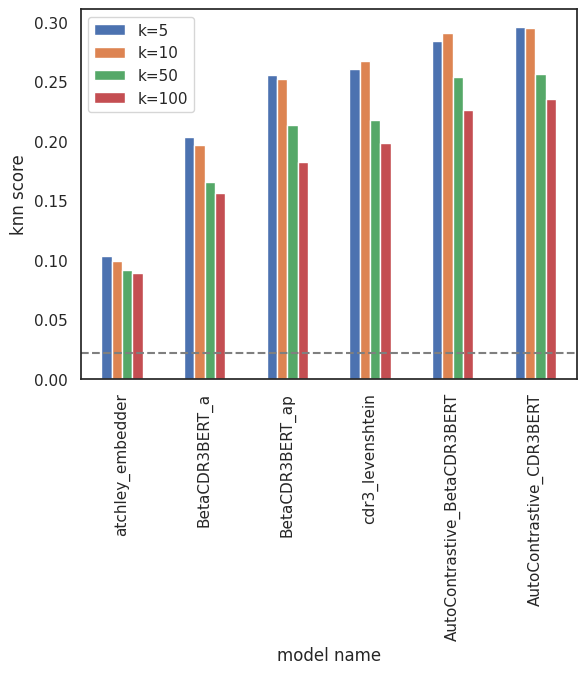

In [65]:
knn_scores.plot(kind='bar')
plt.ylabel('knn score')
plt.xlabel('model name')
plt.axhline(1/46, color='tab:grey', linestyle='dashed')

In [75]:
alnunf = {mdict['model_name']: {'alignment': mdict['alignment'], 'uniformity': mdict['uniformity'], '5nn accuracy': mdict['knn_scores']['5']} for mdict in metric_dicts}
alnunf = pd.DataFrame.from_dict(alnunf, orient='index')
alnunf = alnunf.sort_index()
alnunf.index = alnunf.index.map(collapse_names)
alnunf['alignment + uniformity'] = alnunf['alignment'] + alnunf['uniformity']
alnunf = alnunf[alnunf.index != 'cdr3_levenshtein']

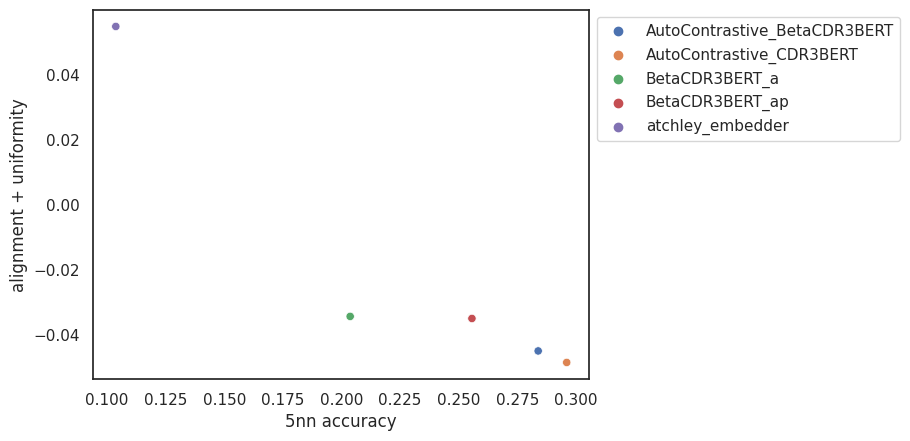

In [76]:
scatter_model_names = seaborn.scatterplot(alnunf, x='5nn accuracy', y='alignment + uniformity', hue=alnunf.index)
seaborn.move_legend(scatter_model_names, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

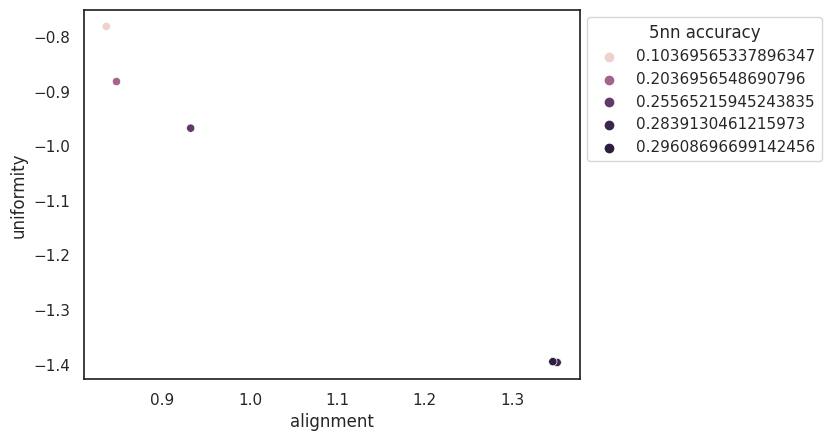

In [77]:
scatter_model_names = seaborn.scatterplot(alnunf, x='alignment', y='uniformity', hue='5nn accuracy')
seaborn.move_legend(scatter_model_names, 'upper left', bbox_to_anchor=(1, 1))
plt.show()